In [1]:
import numpy as np
import pandas as pd
from importer_snippets import load_experiment
from scipy.signal import find_peaks, savgol_filter
import matplotlib.pyplot as plt
plt.style.use('JGW-PPT')
import os
os.getcwd()

'C:\\Users\\jgage\\Documents\\GitHub\\CHEM274'

# Nyquist and Bode Plots

In [32]:
EIS = load_experiment()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jgage/Documents/GitHub/CHEM274/data/data.csv'

In [ ]:
def save_Nyq_fig(fig, analyte, electrode, solvent, notebook):
    ans = input('Save the figure?')
    if ans in ['y', 'yes', 'Yes', 'yeye', 'yeah', 'why, certainly', True]:
        fig.savefig("C:\\Users\\jgage\\Documents\GitHub\\CHEM274\\data\\figs\\Nyq_"+
            analyte + electrode + solvent + notebook+'.jpg')
        print('Saved')
    else:
        print('Not saved')

In [ ]:
# Nyquist
fig = plt.figure()
ax = fig.add_subplot()

# ax.set_title('Nyquist Plot')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.scatter(EIS.data['Zre'], -EIS.data['Zim'], label = 'data')
ax.set_xlabel('$Z_{re}$ / $\Omega$')
ax.set_ylabel('-$Z_{im}$ / $\Omega$')
ax.set_xlim ([0,1.1*max(EIS.data['Zre'])])
ax.set_ylim ([0,1.1*max(-EIS.data['Zim'])])
fig.tight_layout()

analyte = 'Feacac_'
electrode = 'GC_'
solvent = 'MeCN_'
notebook = '_P-03-04'

plt.show()
# save_Nyq_fig(fig, analyte, electrode, solvent, notebook)
EIS.params

In [ ]:
# Bode
Z_mag = np.sqrt(EIS.data['Zre']**2 * EIS.data['Zim']**2)
log_Z_mag = np.log10(Z_mag)
phi = np.arctan(EIS.data['Zim'] / EIS.data['Zre']) * 180 / np.pi # phase angle in degrees
log_omega = np.log10(EIS.data['f'])


fig = plt.figure()
ax = fig.add_subplot()

# ax.set_title('Bode Plot')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
ax.scatter(log_omega, log_Z_mag, label = 'Impedance')
ax.set_ylabel('log$|Z|$', color='C0')
ax.set_xlabel('log$\omega$')

ax2 = ax.twinx()
ax2.scatter(log_omega, phi, label = 'Phase', color='C1')
ax2.set_ylabel('$\phi$ / degrees', color='C1')
plt.grid()
fig.tight_layout()

# Cyclic Voltammograms

In [6]:
CV = load_experiment()

In [7]:

CV.data['Ecell'] = CV.data['Ecell'] - 0.101984
CV.data

,E_program,Ecell,iw,t
0,-1.000000,-1.101437,-0.000047,0.000000
1,-1.000000,-1.100779,-0.000047,0.000278
2,-1.000000,-1.101437,-0.000047,0.000556
3,-1.000000,-1.101766,-0.000047,0.000833
4,-1.000000,-1.101437,-0.000047,0.001111
...,...,...,...,...
187195,-0.999889,-1.100779,-0.000041,51.998611
187196,-0.999917,-1.101108,-0.000041,51.998889
187197,-0.999944,-1.101437,-0.000041,51.999167
187198,-0.999972,-1.101766,-0.000041,51.999444


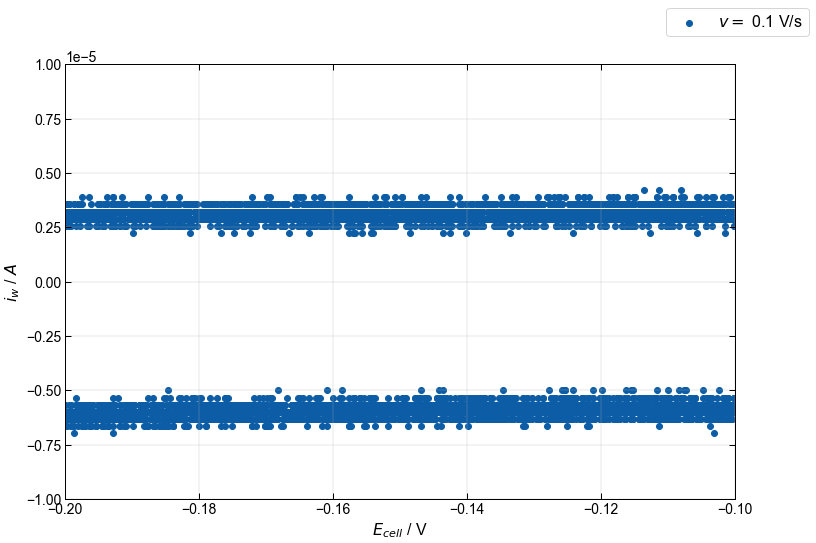

In [10]:
# CV
fig = plt.figure()
ax = fig.add_subplot()

# ax.set_title('Cyclic Voltammogram')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.scatter(CV.data['Ecell'], CV.data['iw'], label = '$v=$ '+str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + ' V/s')
ax.set_xlabel('$E_{cell}$ / V')
ax.set_ylabel('$i_{w}$ / $A$')
ax.set_xlim(-.2,-.1)
ax.set_ylim(-1e-5, 1e-5)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.style.use('JGW')
fig.legend()

### Find CV Peaks

In [8]:
# Smooth data using the Savitski Golay method
smooth_iw = savgol_filter(CV.data['iw'], 25, 2)
# Check the result
# plt.plot(CV.data['Ecell'], smooth_iw, zorder=1, color='r')
# plt.plot(CV.data['Ecell'], CV.data['iw'], label = '$v=$ '+str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + ' V/s', zorder=0)
# plt.xlim(-.75, -.74)
# plt.ylim(.00003, .00004)

# Maxima
find_ipa = find_peaks(smooth_iw, height=0, width=3600) # Must give minimum height to get peak_heights dict.
ipa, Epa = CV.data['iw'][find_ipa[0]].to_numpy(), CV.data['Ecell'][find_ipa[0]].to_numpy()

# Invert signal to find minima - Signals are negative but indicies are correct!
find_ipc = find_peaks(-smooth_iw, height=0, width=3600) # Remember to un-invert anytime if calling ipc values from find_ipc, but not indicies.
ipc, Epc = CV.data['iw'][find_ipc[0]].to_numpy(), CV.data['Ecell'][find_ipc[0]].to_numpy()

peaks = {'ipa': ipa[0], 'Epa': Epa[0], 'ipc': ipc[0], 'Epc': Epc[0]}
# df = pd.DataFrame(data=format(peaks), index=[CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()]) # Gives a little table, but rounds values...
print(peaks)

{'ipa': 3.084960856025959e-05, 'Epa': 0.5566895036143278, 'ipc': -2.2096088492937706e-05, 'Epc': 0.4721736073202658}


#### Peak picking and figure saving

In [29]:
def save_CV_fig(fig, analyte, electrode, solvent, notebook):
    ans = input('Save the figure?')
    if ans in ['y', 'yes', 'Yes', 'yeye', 'yeah', 'why, certainly', True]:
        fig.savefig(r"C:\\Users\\jgage\\Documents\GitHub\\CHEM274\\data\\figs\\CV_"+
            analyte + electrode + solvent +
            str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + 'Vs-1_'+
                notebook+'.jpg')
        print('Saved')
    else:
        print('Not saved')

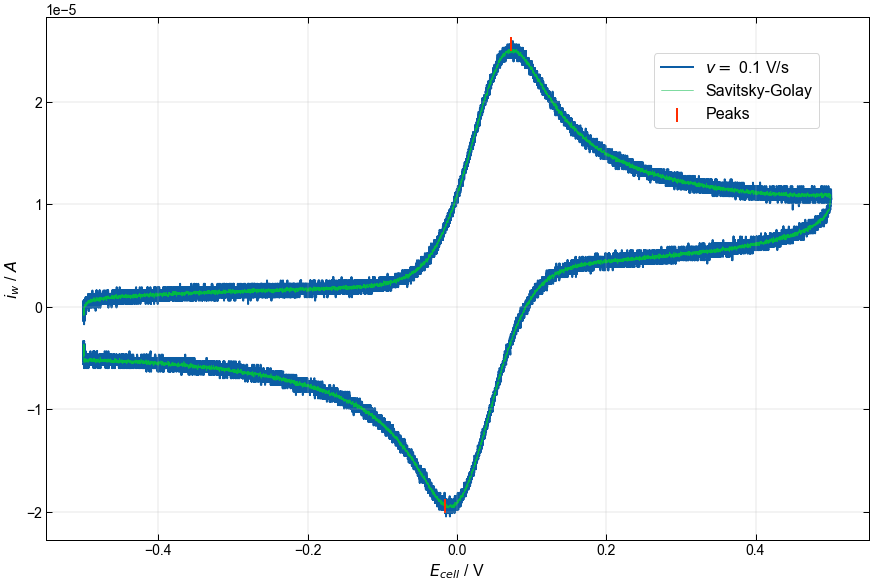

Save the figure? y


Saved


In [36]:
# Draw same plot as above, but with peaks
fig = plt.figure()
ax = fig.add_subplot()

ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
ax.plot(CV.data['Ecell'], CV.data['iw'], label = '$v=$ '+str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + ' V/s', zorder=0)
ax.plot(CV.data['Ecell'], smooth_iw, color='C2', label='Savitsky-Golay', lw=.5, zorder=.5)
ax.scatter([*Epa, *Epc], [*ipa, *ipc], color='C1', label='Peaks', marker='|', s=200, zorder=1)
fig.tight_layout()

# ax.set_title('Cyclic Voltammogram')
ax.set_xlabel('$E_{cell}$ / V')
ax.set_ylabel('$i_{w}$ / $A$')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.legend(loc=(0.75, 0.78))

analyte = 'FcStar_'
electrode = 'GC_'
solvent = 'MeAc'
notebook = '_P-09-03'

plt.show()
save_CV_fig(fig, analyte, electrode, solvent, notebook)

##### 

# Chronoamperograms

In [49]:
CA = load_experiment()

In [54]:
CA2 = load_experiment() #10 kOhm

In [15]:
CA.data

,E_program,Ecell,iw,t
0,0.0,0.000015,3.442151e-07,0.000000
1,0.0,0.000673,-3.136978e-07,0.000278
2,0.0,0.000344,1.525869e-08,0.000556
3,0.0,0.000344,3.442151e-07,0.000833
4,0.0,0.000015,3.442151e-07,0.001111
...,...,...,...,...
25195,0.0,0.000344,-1.958480e-06,6.998611
25196,0.0,0.000344,-2.616393e-06,6.998889
25197,0.0,0.000015,-2.616393e-06,6.999167
25198,0.0,0.000344,-2.616393e-06,6.999444


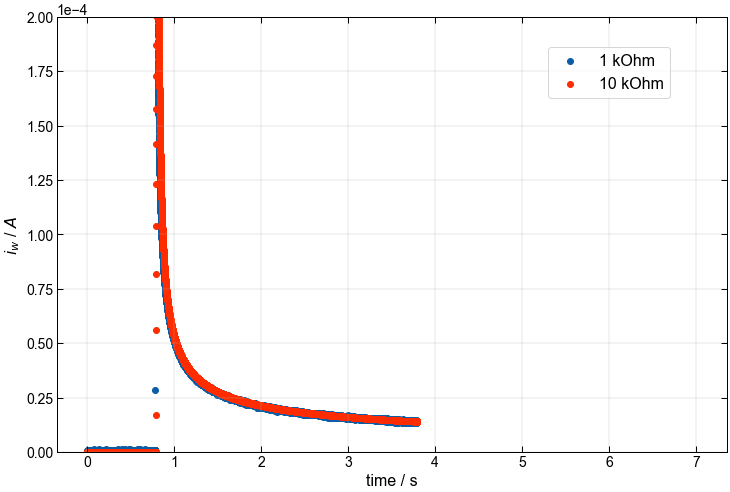

In [57]:
# CV
fig = plt.figure()
ax = fig.add_subplot()

# ax.set_title('Cyclic Voltammogram')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.scatter(CA.data['t'], CA.data['iw'], label='1 kOhm')
ax.scatter(CA2.data['t'], CA2.data['iw'], label='10 kOhm')
ax.set_xlabel('time / s')
ax.set_ylabel('$i_{w}$ / $A$')

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_ylim(0, 2e-4)
plt.style.use('JGW')
fig.legend(loc=(0.75, 0.8))